###### **Data Exploration**

In [1]:
# load and summarize the dataset

from pandas import read_csv
from pandas import set_option
from collections import Counter

# define the dataset location
filename = './data/ecoli.csv'

# load the csv file as a data frame
dataframe = read_csv(filename, header=None)

# summarize the shape of the dataset
print("shape of the dataset: ", dataframe.shape)

# describe the dataset
set_option('precision', 3)
print("###"*10)
print("dataset description: ")
print(dataframe.describe())

# summarize the class distribution
print("###"*10)
print("class distribution: ")
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

shape of the dataset:  (336, 8)
##############################
dataset description: 
             0        1        2        3        4        5        6
count  336.000  336.000  336.000  336.000  336.000  336.000  336.000
mean     0.500    0.500    0.495    0.501    0.500    0.500    0.500
std      0.195    0.148    0.088    0.027    0.122    0.216    0.209
min      0.000    0.160    0.480    0.500    0.000    0.030    0.000
25%      0.340    0.400    0.480    0.500    0.420    0.330    0.350
50%      0.500    0.470    0.480    0.500    0.495    0.455    0.430
75%      0.662    0.570    0.480    0.500    0.570    0.710    0.710
max      0.890    1.000    1.000    1.000    0.880    1.000    0.990
##############################
class distribution: 
Class=cp, Count=143, Percentage=42.560%
Class=im, Count=77, Percentage=22.917%
Class=imS, Count=2, Percentage=0.595%
Class=imL, Count=2, Percentage=0.595%
Class=imU, Count=35, Percentage=10.417%
Class=om, Count=20, Percentage=5.952%
Class=omL

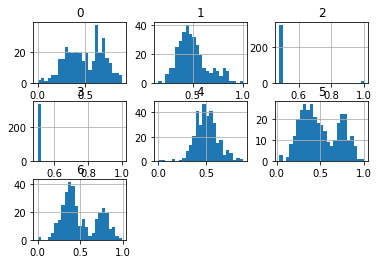

In [2]:
# create histograms of all variables

from pandas import read_csv
from matplotlib import pyplot

# define the dataset location
filename = './data/ecoli.csv'

# load the csv file as a data frame
df = read_csv(filename, header=None)

# create a histogram plot of each variable
df.hist(bins=25)

# show the plot
pyplot.show()

###### **Model Test and Baseline Result**

In [3]:
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    df = read_csv(full_path, header=None)
    # remove rows for the minority classes
    df = df[df[7] != 'imS']
    df = df[df[7] != 'imL']
    # retrieve numpy array
    data = df.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable to have the classes 0 and 1
    y = LabelEncoder().fit_transform(y)
    return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define the location of the dataset
full_path = './data/ecoli.csv'
# load the dataset
X, y = load_dataset(full_path)
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
# define the reference model
model = DummyClassifier(strategy='most_frequent')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

(332, 7) (332,) Counter({0: 143, 1: 77, 5: 52, 2: 35, 3: 20, 4: 5})
Mean Accuracy: 0.431 (0.006)


###### **Evaluate Machine Learning Algorithms**

>LDA 0.881 (0.041)
>SVM 0.882 (0.040)
>BAG 0.860 (0.035)
>RF 0.886 (0.026)
>ET 0.877 (0.033)


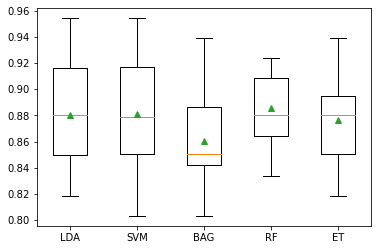

In [4]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    df = read_csv(full_path, header=None)
    # remove rows for the minority classes
    df = df[df[7] != 'imS']
    df = df[df[7] != 'imL']
    # retrieve numpy array
    data = df.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable
    y = LabelEncoder().fit_transform(y)
    return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define models to test
def get_models():
    models, names = list(), list()
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # SVM
    models.append(LinearSVC())
    names.append('SVM')
    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    return models, names
 
# define the location of the dataset
full_path = './data/ecoli.csv'

# load the dataset
X, y = load_dataset(full_path)

# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###### **Evaluate Data Oversampling**

>LDA 0.884 (0.041)
>SVM 0.882 (0.040)
>BAG 0.836 (0.036)
>RF 0.867 (0.033)
>ET 0.870 (0.035)


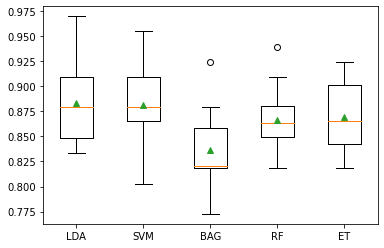

In [5]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    df = read_csv(full_path, header=None)
    # remove rows for the minority classes
    df = df[df[7] != 'imS']
    df = df[df[7] != 'imL']
    # retrieve numpy array
    data = df.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable
    y = LabelEncoder().fit_transform(y)
    return X, y
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define models to test
def get_models():
    models, names = list(), list()
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # SVM
    models.append(LinearSVC())
    names.append('SVM')
    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    return models, names
 
# define the location of the dataset
full_path = './data/ecoli.csv'

# load the dataset
X, y = load_dataset(full_path)

# define models
models, names = get_models()
results = list()

# evaluate each model
for i in range(len(models)):
    # create pipeline
    steps = [('o', SMOTE(k_neighbors=2)), ('m', models[i])]
    pipeline = Pipeline(steps=steps)
    # evaluate the model and store results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

###### **Make Predictions on New Data using Random Forest model**

In [6]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
 
# load the dataset
def load_dataset(full_path):
    # load the dataset as a numpy array
    df = read_csv(full_path, header=None)
    # remove rows for the minority classes
    df = df[df[7] != 'imS']
    df = df[df[7] != 'imL']
    # retrieve numpy array
    data = df.values
    # split into input and output elements
    X, y = data[:, :-1], data[:, -1]
    # label encode the target variable
    le = LabelEncoder()
    y = le.fit_transform(y)
    return X, y, le
 
# define the location of the dataset
full_path = './data/ecoli.csv'

# load the dataset
X, y, le = load_dataset(full_path)

# define model to evaluate
model = RandomForestClassifier(n_estimators=1000)

# fit the model
model.fit(X, y)

# known class "cp"
row = [0.49,0.29,0.48,0.50,0.56,0.24,0.35]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected cp)' % (label))

# known class "im"
row = [0.06,0.61,0.48,0.50,0.49,0.92,0.37]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected im)' % (label))

# known class "imU"
row = [0.72,0.42,0.48,0.50,0.65,0.77,0.79]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected imU)' % (label))

# known class "om"
row = [0.78,0.68,0.48,0.50,0.83,0.40,0.29]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected om)' % (label))

# known class "omL"
row = [0.77,0.57,1.00,0.50,0.37,0.54,0.0]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected omL)' % (label))

# known class "pp"
row = [0.74,0.49,0.48,0.50,0.42,0.54,0.36]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected pp)' % (label))

>Predicted=cp (expected cp)
>Predicted=im (expected im)
>Predicted=imU (expected imU)
>Predicted=om (expected om)
>Predicted=omL (expected omL)
>Predicted=pp (expected pp)
